In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import ScalarFormatter
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [3]:
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.width', None)

In [4]:
iot_df = pd.read_csv('../data/IoT_Botnet_Full_Data.csv')
iot_df

C:\Users\emers\AppData\Local\Temp\ipykernel_18792\2255246871.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  iot_df = pd.read_csv('../data/IoT_Botnet_Full_Data.csv')


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96,75,1.135260,1.129970,770,602,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,3668518,1.529381e+09,e,1,tcp,1,192.168.100.150,35064,192.168.100.3,22,...,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
3668518,3668519,1.529381e+09,e,1,tcp,1,192.168.100.150,35066,192.168.100.3,22,...,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
3668519,3668520,1.529381e+09,e,1,tcp,1,192.168.100.150,35070,192.168.100.3,22,...,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
3668520,3668521,1.529381e+09,e,1,tcp,1,192.168.100.3,43001,192.168.100.150,4433,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


In [5]:
# drop irrelevant columns I will not analyze or involve in the training process of my machine learning models
columns_to_drop = ['pkSeqID', 'stime', 'saddr', 'ltime', 'daddr', 'seq', 'flgs_number', 'proto_number', 'state_number']
iot_df= iot_df.drop(columns=columns_to_drop)
iot_df

,flgs,proto,sport,dport,pkts,bytes,state,dur,mean,stddev,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,e,tcp,49960,80,8,1980,RST,7.056393,0.068909,0.068909,...,1.127040,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,e,arp,-1,-1,2,120,CON,0.000131,0.000131,0.000000,...,15267.200000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,e,tcp,49962,80,8,2126,RST,7.047852,0.064494,0.064494,...,1.127040,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,e,tcp,49964,80,8,2024,RST,7.047592,0.064189,0.064189,...,1.127040,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,e,tcp,49966,80,8,2319,RST,7.046841,0.063887,0.063887,...,1.127040,96,75,1.135260,1.129970,770,602,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,e,tcp,35064,22,6,434,RST,0.013165,0.013165,0.000000,...,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
3668518,e,tcp,35066,22,6,434,RST,0.000574,0.000574,0.000000,...,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
3668519,e,tcp,35070,22,31,5472,FIN,2.874302,2.874302,0.000000,...,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
3668520,e,tcp,43001,4433,2,134,RST,0.000003,0.000003,0.000000,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


In [6]:
# frequency of attacks and its different types
iot_df[['category', 'subcategory']].value_counts()

category        subcategory      
DoS             UDP                  1032975
DDoS            TCP                   977380
                UDP                   948255
DoS             TCP                   615800
Reconnaissance  Service_Scan           73168
                OS_Fingerprint         17914
DoS             HTTP                    1485
DDoS            HTTP                     989
Normal          Normal                   477
Theft           Keylogging                73
                Data_Exfiltration          6
Name: count, dtype: int64

In [7]:
# frequency of different flgs
iot_df['flgs'].value_counts()

flgs
e        2293445
e s      1245171
e g        94344
eU         34599
e *          816
e d          137
e &            5
e   t          4
e  D           1
Name: count, dtype: int64

In [8]:
# frequency of different protocols
iot_df['proto'].value_counts()

proto
udp          1996437
tcp          1662812
icmp            9052
arp              213
ipv6-icmp          8
Name: count, dtype: int64

In [9]:
# frequency of different states
iot_df['state'].value_counts()

state
INT    1996208
REQ     878697
RST     775168
URP       8950
FIN       6387
ACC       2476
CON        526
ECO         70
TST         16
MAS         16
NRS          8
Name: count, dtype: int64

In [10]:
# converts sport and dport column string and hexadecimal values to integers
def port_col_type_convert(port_num):
    if type(port_num) is str:
        if "x" in port_num:
            return int(port_num, 16) # convert hex to int
        else:
            return int(port_num) # convert string to int
    return port_num

iot_df['sport'] = iot_df['sport'].apply(port_col_type_convert)
iot_df['dport'] = iot_df['dport'].apply(port_col_type_convert)

In [11]:
# convert destination port and source port for icmp flows to -1 since icmp does not use ports
# and also their values were in hexadecimal form
iot_df.loc[iot_df['proto'] == 'icmp', 'dport'] = -1
iot_df.loc[iot_df['proto'] == 'icmp', 'sport'] = -1
iot_df

,flgs,proto,sport,dport,pkts,bytes,state,dur,mean,stddev,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,e,tcp,49960,80,8,1980,RST,7.056393,0.068909,0.068909,...,1.127040,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,e,arp,-1,-1,2,120,CON,0.000131,0.000131,0.000000,...,15267.200000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,e,tcp,49962,80,8,2126,RST,7.047852,0.064494,0.064494,...,1.127040,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,e,tcp,49964,80,8,2024,RST,7.047592,0.064189,0.064189,...,1.127040,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,e,tcp,49966,80,8,2319,RST,7.046841,0.063887,0.063887,...,1.127040,96,75,1.135260,1.129970,770,602,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,e,tcp,35064,22,6,434,RST,0.013165,0.013165,0.000000,...,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
3668518,e,tcp,35066,22,6,434,RST,0.000574,0.000574,0.000000,...,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
3668519,e,tcp,35070,22,31,5472,FIN,2.874302,2.874302,0.000000,...,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
3668520,e,tcp,43001,4433,2,134,RST,0.000003,0.000003,0.000000,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


In [12]:
# shows bar chart of data for categorical features
def categ_feature_bar(valueCounts, feature_name, the_color='red'):
    plt.figure(figsize=(8,6))
    plt.bar(valueCounts.index, valueCounts.values, color=the_color)
    plt.xlabel(feature_name)
    plt.ylabel('counts')
    plt.title('Bar Chart of ' + feature_name)
    plt.ticklabel_format(style='plain', axis='y')  # Alternative method for disabling scientific notation
    plt.show()

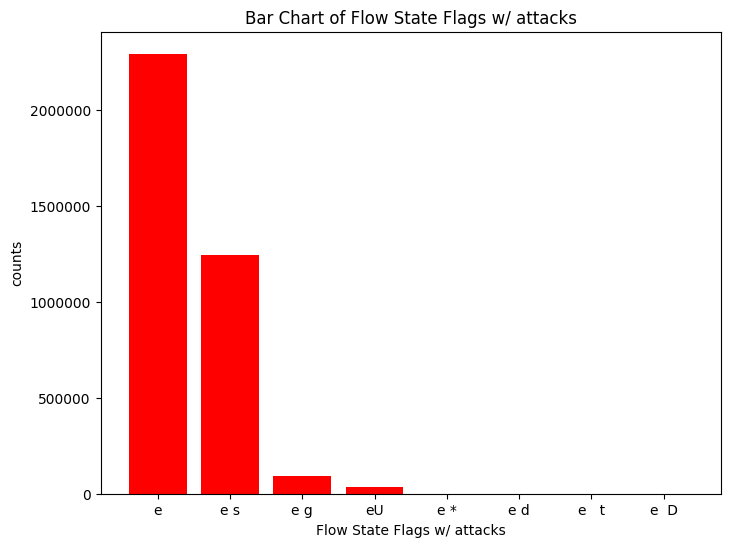

In [13]:
# frequency of flow state flags where flows are attacks
flgs_dist = iot_df[iot_df['attack'] == 1]['flgs'].value_counts()
categ_feature_bar(flgs_dist, "Flow State Flags w/ attacks")

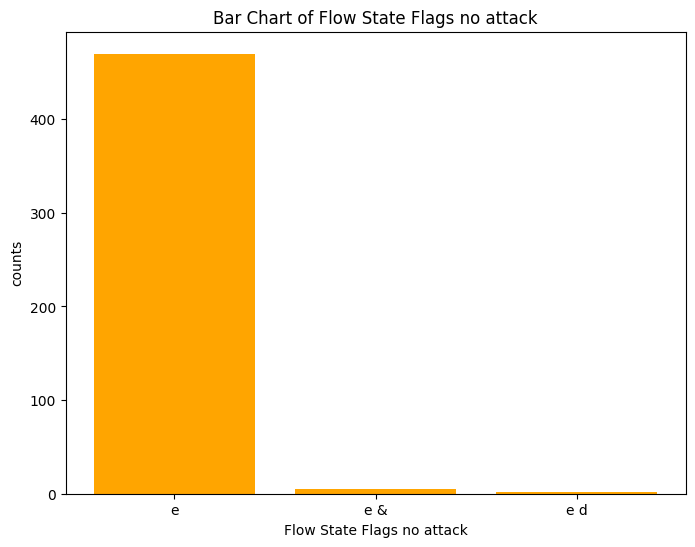

In [14]:
# frequency of flow state flags that are not attacks
flgs_dist_no_attack = iot_df[iot_df['attack'] == 0]['flgs'].value_counts()
categ_feature_bar(flgs_dist_no_attack, "Flow State Flags no attack", "orange")

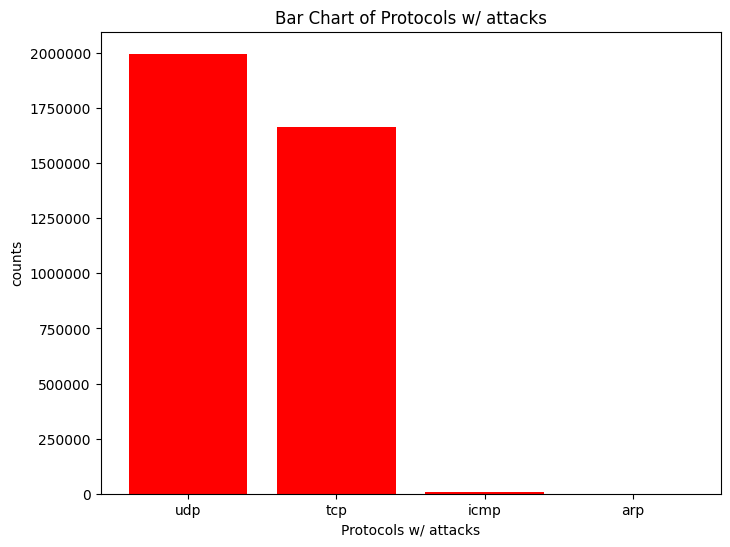

In [15]:
# frequency of protocols where flows are attacks
proto_dist = iot_df[iot_df['attack'] == 1]['proto'].value_counts()
categ_feature_bar(proto_dist, "Protocols w/ attacks")

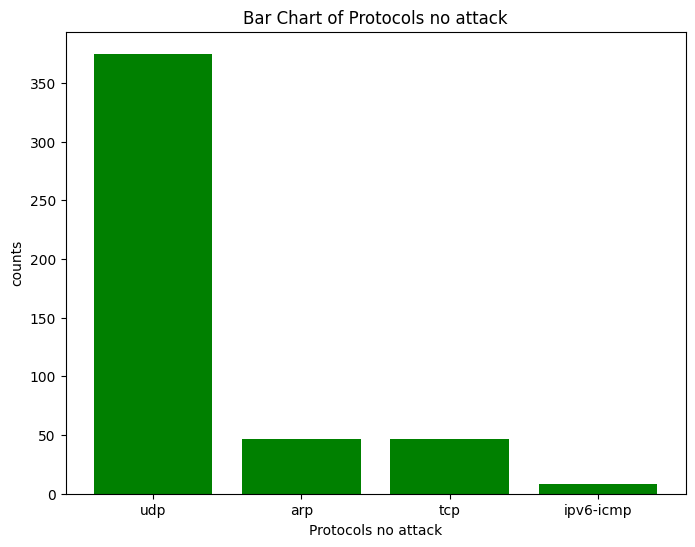

In [16]:
# frequency of protocols w/ no attack
proto_no_attack = iot_df[iot_df['attack'] == 0]['proto'].value_counts()
categ_feature_bar(proto_no_attack, "Protocols no attack", "green")

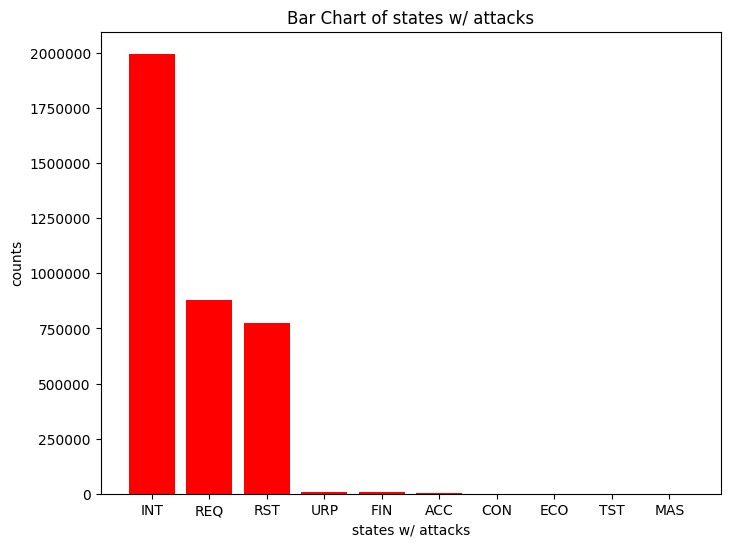

In [17]:
# frequency of state for flows that are attacks
sport_dist = iot_df[iot_df['attack'] == 1]['state'].value_counts()
categ_feature_bar(sport_dist, 'states w/ attacks')

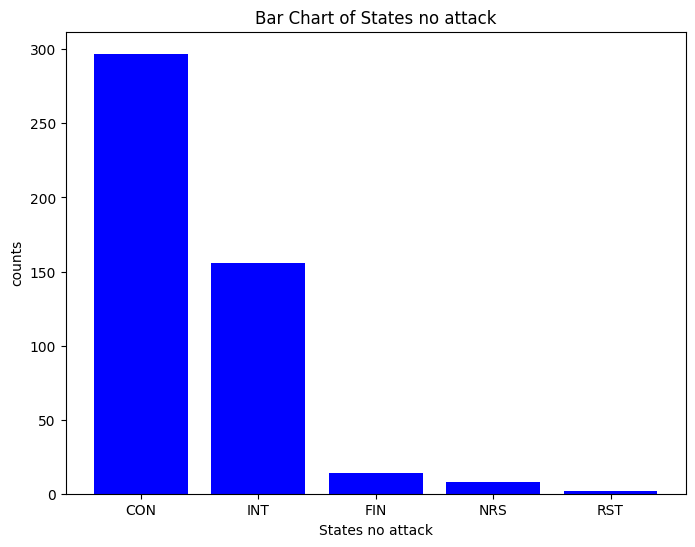

In [18]:
# frequency of states w/ attacks
state_no_attack = iot_df[iot_df['attack'] == 0]['state'].value_counts()
categ_feature_bar(state_no_attack, "States no attack", "blue")

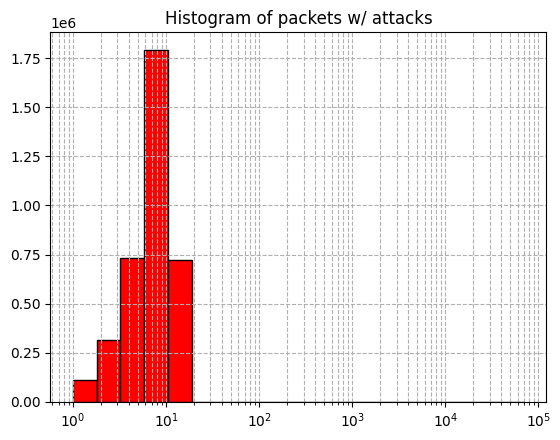

In [19]:
# histogram of packets for flows
df10 = iot_df[iot_df['attack'] == 1]['pkts']
log_bins = np.logspace(np.log10(iot_df['pkts'].min()), np.log10(iot_df['pkts'].max()), 20)
plt.hist(df10, bins=log_bins, color='red', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of packets w/ attacks')
plt.grid(True, which="both", ls="--")
plt.show()

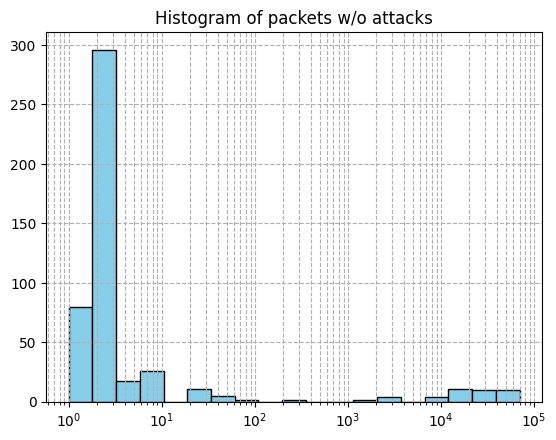

In [20]:
# histogram of packets for flows that are not attacks
# histogram of packets for flows
df4 = iot_df[iot_df['attack'] == 0]['pkts']
log_bins = np.logspace(np.log10(df4.min()), np.log10(df4.max()), 20)
plt.hist(df4, bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of packets w/o attacks')
plt.grid(True, which="both", ls="--")
plt.show()

In [21]:
def log_freq_table(the_df):    
# Define packet count ranges
    ranges = [
        (1, 10),
        (10, 100),
        (100, 1000),
        (1000, 10000),
        (10000, 100000)
    ]

    # Initialize dictionary to store frequency counts
    frequency_counts = {'Range': [], 'Frequency': []}

    # Iterate over each range
    for lower, upper in ranges:
        # Count flows within the current range
        count = ((the_df >= lower) & (the_df < upper)).sum()
        # Append range and count to frequency_counts dictionary
        frequency_counts['Range'].append(f'{lower}-{upper}')
        frequency_counts['Frequency'].append(count)

    # Create DataFrame from frequency_counts dictionary
    frequency_df = pd.DataFrame(frequency_counts)
    return frequency_df

In [22]:
# frequency of packets for attack flows
df6 = iot_df[iot_df['attack'] == 1]['pkts']
df6 = log_freq_table(df6)
df6

,Range,Frequency
0,1-10,2802639
1,10-100,865400
2,100-1000,2
3,1000-10000,4
4,10000-100000,0


In [23]:
# frequency of packets for non-attack flows
df6 = iot_df[iot_df['attack'] == 0]['pkts']
df6 = log_freq_table(df6)
df6

,Range,Frequency
0,1-10,408
1,10-100,28
2,100-1000,1
3,1000-10000,7
4,10000-100000,33


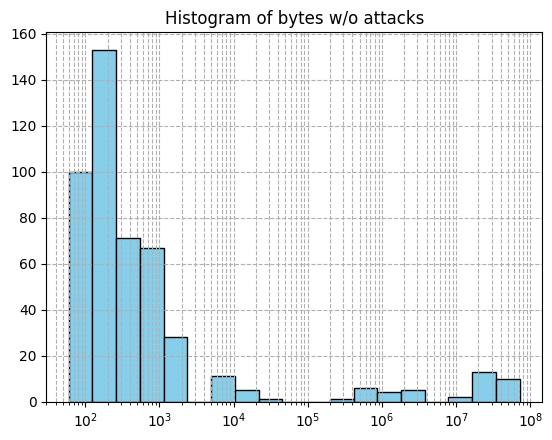

In [24]:
# histogram of bytes for flows that are not attacks flows
df70 = iot_df[iot_df['attack'] == 0]['bytes']
log_bins = np.logspace(np.log10(df70.min()), np.log10(df70.max()), 20)
plt.hist(df70, bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of bytes w/o attacks')
plt.grid(True, which="both", ls="--")
plt.show()

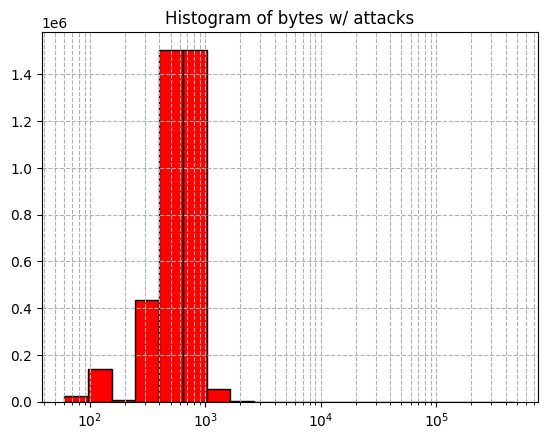

In [25]:
# histogram of bytes for flows that are attack flows
df40 = iot_df[iot_df['attack'] == 1]['bytes']
log_bins = np.logspace(np.log10(df40.min()), np.log10(df40.max()), 20)
plt.hist(df40, bins=log_bins, color='red', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of bytes w/ attacks')
plt.grid(True, which="both", ls="--")
plt.show()

In [26]:
# frequency of bytes for attack flows
df99 = iot_df[iot_df['attack'] == 1]['bytes']
df99 = log_freq_table(df99)
df99

,Range,Frequency
0,1-10,0
1,10-100,24225
2,100-1000,3514851
3,1000-10000,128858
4,10000-100000,107


In [27]:
# frequency of bytes for non-attack flows
df99 = iot_df[iot_df['attack'] == 0]['bytes']
df99 = log_freq_table(df99)
df99

,Range,Frequency
0,1-10,0
1,10-100,66
2,100-1000,322
3,1000-10000,42
4,10000-100000,6


In [28]:
# most occurring source ports
iot_df['sport'].value_counts()

sport
-1        9265
 80       4012
 2290     1084
 1589     1082
 2456     1082
          ... 
 26801      51
 26869      51
 26804      51
 26805      51
 26862      51
Name: count, Length: 65537, dtype: int64

In [29]:
# most occurring destination ports
iot_df['dport'].value_counts()

dport
 80      3573575
-1          9265
 1          6745
 3306       4613
 53          340
          ...   
 4483          1
 4482          1
 4477          1
 4476          1
 2664          1
Name: count, Length: 6618, dtype: int64

In [30]:
# most occurring destination ports for attacks
iot_df[iot_df['attack'] == 1]['dport'].value_counts()

dport
 80      3573552
-1          9218
 1          6745
 3306       4611
 21          204
          ...   
 8917          1
 8916          1
 8913          1
 8912          1
 2664          1
Name: count, Length: 6613, dtype: int64

In [31]:
# most occurring destination ports for non-attacks
iot_df[iot_df['attack'] == 0]['dport'].value_counts()

dport
 53       251
 5353      65
-1         47
 80        23
 123       20
 443       16
 0         13
 138        8
 8883       5
 565        5
 36390      4
 8610       4
 8612       4
 1124       2
 3289       2
 8080       2
 3306       2
 67         2
 5355       1
 137        1
Name: count, dtype: int64

In [32]:
# ARP protocol, ICMP protocol, and ipv6-icmp protocol only see one type of attack class for each one
# This is not useful for the machine learning model to identify flows from these protocols as either attack or not
# so flows with these protocols will be removed
iot_df = iot_df[iot_df['proto'] != 'arp']
iot_df = iot_df[iot_df['proto'] != 'icmp']
iot_df = iot_df[iot_df['proto'] != 'ipv6-icmp']
iot_df['proto'].value_counts()

proto
udp    1996437
tcp    1662812
Name: count, dtype: int64

In [33]:
# converting source port numbers to categories
conditions = [
    ((iot_df['sport'] >= 0) & (iot_df['sport'] <= 1023)),
    ((iot_df['sport'] >= 1024) & (iot_df['sport'] <= 49151)),
    (iot_df['sport'] >= 49152)
]

values = ['well_known', 'registered', 'dynamic/private']
iot_df['sport_category'] = np.select(conditions, values, default='Unknown')
iot_df[['sport', 'sport_category']]
iot_df['sport_category'].value_counts()

sport_category
registered         2653122
dynamic/private     945710
well_known           60417
Name: count, dtype: int64

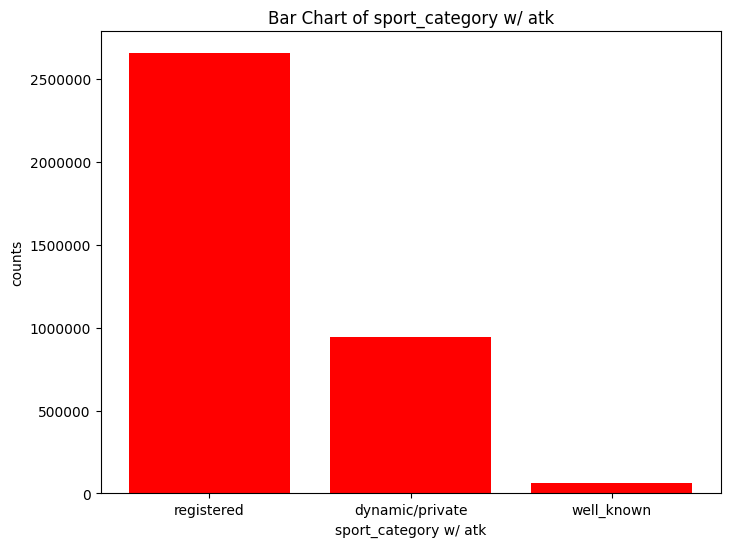

In [34]:
# distribution of sport categories where flows are malicious
sport_categ_attack = iot_df[iot_df['attack'] == 1]
sport_categ_valueCounts = sport_categ_attack['sport_category'].value_counts()
categ_feature_bar(sport_categ_valueCounts, "sport_category w/ atk")

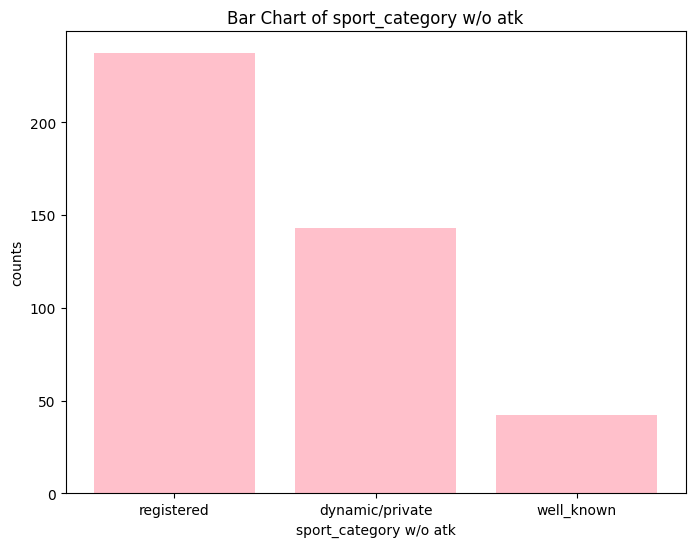

In [35]:
# distribution of sport categories where flows are not malicious
sport_categ_attack = iot_df[iot_df['attack'] == 0]
sport_categ_valueCounts = sport_categ_attack['sport_category'].value_counts()
categ_feature_bar(sport_categ_valueCounts, "sport_category w/o atk", "pink")

In [36]:
# converting destination port numbers to categories
conditions = [
    ((iot_df['dport'] >= 0) & (iot_df['dport'] <= 1023)),
    ((iot_df['dport'] >= 1024) & (iot_df['dport'] <= 49151)),
    (iot_df['dport'] >= 49152)
]

values = ['well_known', 'registered', 'dynamic/private']
iot_df['dport_category'] = np.select(conditions, values, default='Unknown')
iot_df[['dport', 'dport_category']]
iot_df['dport_category'].value_counts()

dport_category
well_known         3597844
registered           55759
dynamic/private       5646
Name: count, dtype: int64

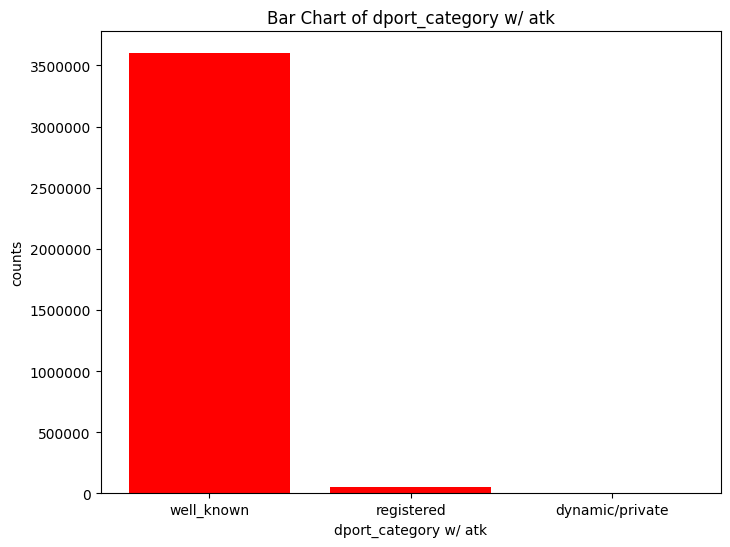

In [37]:
# distribution of dport categories where flows are malicious
dport_categ_attack = iot_df[iot_df['attack'] == 1]
dport_categ_valueCounts = dport_categ_attack['dport_category'].value_counts()
categ_feature_bar(dport_categ_valueCounts, "dport_category w/ atk")

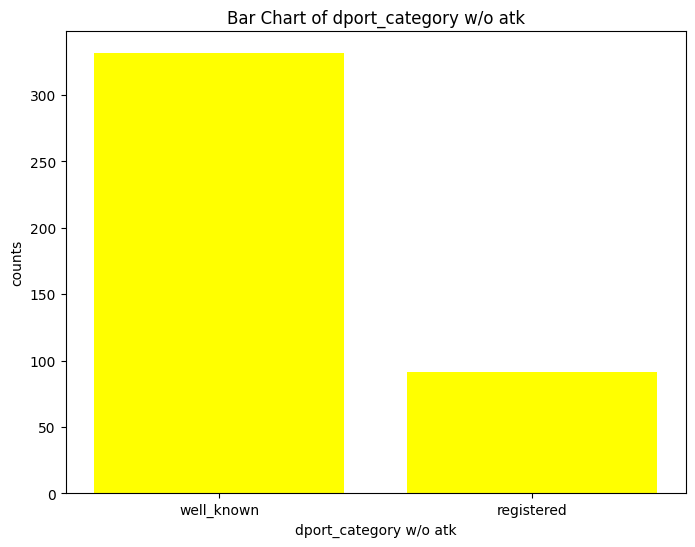

In [38]:
# distribution of dport categories where flows are not malicious
dport_categ_no_attack = iot_df[iot_df['attack'] == 0]
dport_categ_valueCounts_no_atk = dport_categ_no_attack['dport_category'].value_counts()
categ_feature_bar(dport_categ_valueCounts_no_atk, "dport_category w/o atk", "yellow")

In [39]:
iot_df.columns

Index(['flgs', 'proto', 'sport', 'dport', 'pkts', 'bytes', 'state', 'dur',
       'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory', 'sport_category',
       'dport_category'],
      dtype='object')

In [40]:
iot_df_no_categ = iot_df.drop(columns=['flgs', 'proto', 'sport', 'dport', 'state', 'category', 'subcategory', 'sport_category', 'dport_category'])
iot_df_no_categ.columns

Index(['pkts', 'bytes', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP',
       'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack'],
      dtype='object')

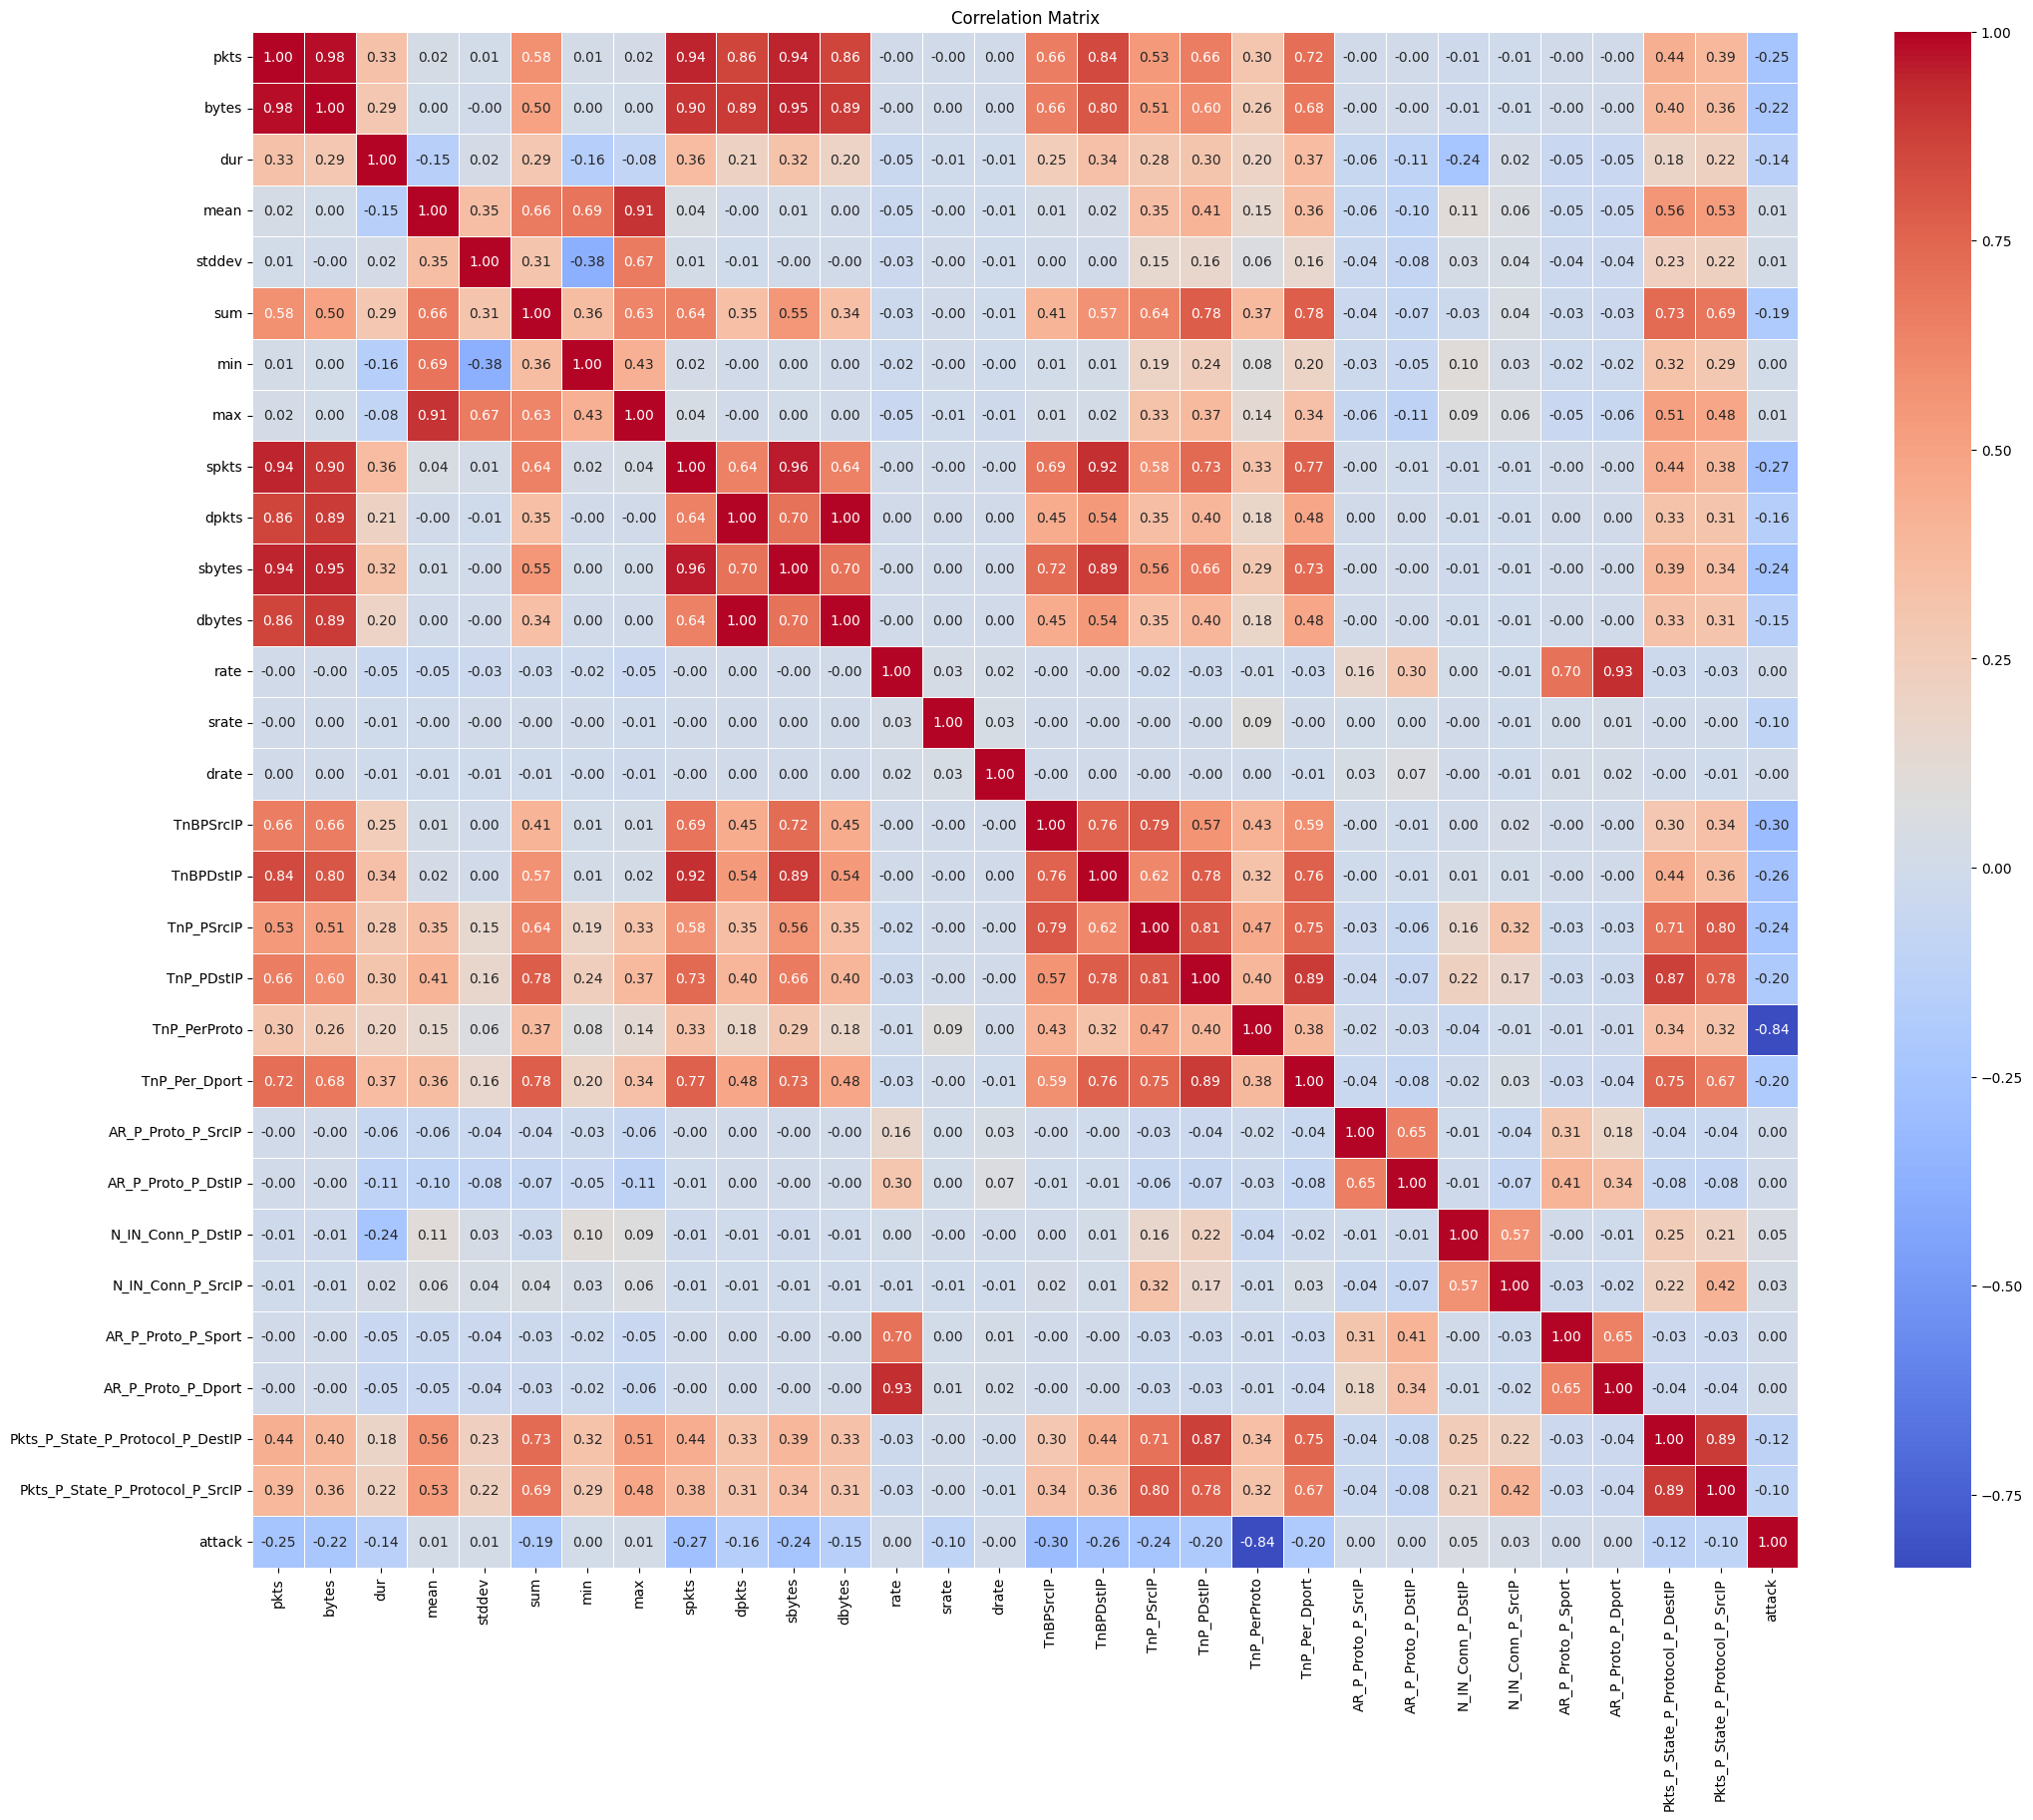

In [41]:
# correlation matrix of data
corr_matrix = iot_df_no_categ.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
# final columns to drop for dataset used to be trained in model
# to be dropped: sport, dport, category, subcategory
iot_df = iot_df.drop(columns=['sport', 'dport', 'category', 'subcategory'])
iot_df.columns

Index(['flgs', 'proto', 'pkts', 'bytes', 'state', 'dur', 'mean', 'stddev',
       'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'sport_category', 'dport_category'],
      dtype='object')

In [50]:
# one hot encoding my categorical variables
categories = ['flgs', 'proto', 'state', 'sport_category', 'dport_category']
encoded_df = pd.get_dummies(iot_df, columns=categories, drop_first=True)
print(encoded_df.columns)
encoded_df

Index(['pkts', 'bytes', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP',
       'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'flgs_e   t', 'flgs_e  D',
       'flgs_e &', 'flgs_e *', 'flgs_e d', 'flgs_e g', 'flgs_e s', 'flgs_eU',
       'proto_udp', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ',
       'state_RST', 'sport_category_registered', 'sport_category_well_known',
       'dport_category_registered', 'dport_category_well_known'],
      dtype='object')


,pkts,bytes,dur,mean,stddev,sum,min,max,spkts,dpkts,...,proto_udp,state_CON,state_FIN,state_INT,state_REQ,state_RST,sport_category_registered,sport_category_well_known,dport_category_registered,dport_category_well_known
0,8,1980,7.056393,0.068909,0.068909,0.137818,0.000000,0.137818,5,3,...,False,False,False,False,False,True,False,False,False,True
2,8,2126,7.047852,0.064494,0.064494,0.128988,0.000000,0.128988,5,3,...,False,False,False,False,False,True,False,False,False,True
3,8,2024,7.047592,0.064189,0.064189,0.128378,0.000000,0.128378,5,3,...,False,False,False,False,False,True,False,False,False,True
4,8,2319,7.046841,0.063887,0.063887,0.127774,0.000000,0.127774,5,3,...,False,False,False,False,False,True,False,False,False,True
5,8,1983,7.046596,0.063579,0.063579,0.127157,0.000000,0.127157,5,3,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668516,6,434,0.023737,0.023737,0.000000,0.023737,0.023737,0.023737,3,3,...,False,False,False,False,False,True,True,False,False,True
3668517,6,434,0.013165,0.013165,0.000000,0.013165,0.013165,0.013165,3,3,...,False,False,False,False,False,True,True,False,False,True
3668518,6,434,0.000574,0.000574,0.000000,0.000574,0.000574,0.000574,3,3,...,False,False,False,False,False,True,True,False,False,True
3668519,31,5472,2.874302,2.874302,0.000000,2.874302,2.874302,2.874302,14,17,...,False,False,True,False,False,False,True,False,False,True


In [51]:
# # convert final dataset into csv to be used for training model
# csv_file_path = '../data/IoT_processed_ready_data.csv'
# encoded_df.to_csv(csv_file_path, index=False)